# Calculating Transmission Through a Straight Pipe With 5 In-line Helmholtz Resonators 

This program calulates and graphs transmission associated with a single wavelength passed through a single Helmholtz resonator. It contains
the transmittance function, the details of which are provided below. The parameters are based on a COMSOL simulation; original parameters are pulled from "Extraordinary acoustic transmission mediated by Helmholtz resonators" by V. Koju et al., AIP Adv., 4, 077132 (2014).

Authors: Kyle Sprague, Bill Robertson, David Heson

Date Written: 15 June 2022

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.constants 


## Relevant equations for the Transmission Function 

To calculate transmittance, we need to use area and length lists; the area list corresponds to the area of the necks and cavities while the length list corresponds to the lengths of these sections. Additionally, we make use of equations 2 and 8 from T. Gu et al., J. Phys. D: Appl. Phys., 54, 175301 (2021). In the case of Gu et. al., they used the matrix method to demonstrate that AIT could be achieved for the case of a Y-split waveguide where each of the two HRs are tuned to a resonance frequency and also generate a Fabry-Perot Resonance frequency as a consequence of their separation distance, which is 1/2 of a wavelength. This then leads to AIT. The equation that they arrived at to describe each of the grafted resonators is 

\begin{equation}  
MT = 
\begin{bmatrix} \label{eq:1}
cos(kL) & j(c/S)sin(kL)\\
j(S/c)sin(kL) & cos(kL) 
\end{bmatrix} 
\end{equation}. 

In this program, one of these matrices is generated for each section of the pipe accounted for in the length and area lists. The respective sections are multiplied together, just as T. Gu et al. did in their paper. However, unlike in Gu et. al, we do not need to consider the Mi matrix (equation 7) because we are dealing with in line matrices. After calculating the matrix product for one particular frequency and all five subsections, we take the pole parameters of this matrix and plug them into 

\begin{equation} \label{eq:2}
T_{HR_{region}} = \dfrac{2}{|{A+B(S/c)+C(c/S)+D}|}
\end{equation}. 



In [50]:
def transmittance(frequency_list, s_list, l_list, S_outside): 

    ''' 
        The transmittance function takes a list of frequencies, the surface areas associated with the HR and waveguides as a list, the
        length of each component of the system as a list, and the surface area of the waveguide as a floating point. It runs
        through two constituent for loops to calculate a matrix associated with each section (T_matrix), then multiplies each matrix by
        the matrix associated with the previous for a new section and the same frequency. After this, the values in the M matrix are pulled
        out and stored in a transmittance list.

        list -- frequency_list: the list of frequency values surrounding the resonant frequency
        list -- s_list: a list of surface areas, each index representing a different section of the system
        list -- l_list: a list of lengths, each index representing a different section of the system
        int -- the surface area for the waveguide

        returns: the absolute value of transmittance for each of the given frequencies as a list

    ''' 

    transmittance_list = np.zeros(len(frequency_list))

    c = 342

    for index in range(0,len(frequency_list)): 

        M = [[1,0],[0,1]]

        current_freq = frequency_list[index]
        k = (2*np.pi*current_freq)/c #in meters

        for r in range(0, len(s_list)): 

            S = s_list[r] 
            L = l_list[r]
            T_matrix = np.array([
                [np.cos(k*L), 1j*((343)/S)*np.sin(k*L)],
                [1j*(S/c)*np.sin(k*L), np.cos(k*L)]
            ]) #this equation comes from section 2.2 of Gu et. al "Induced transparency based 
            #subwavelength acoustic demultiplexers"; it is equation 8

            M = M @ T_matrix 

        A,B,C,D = M[0,0], M[0,1], M[1,0], M[1,1]
        # print(A,D)

        transmittance = 2/(abs(A + B*(S_outside/c) + C*(c/S_outside) + D))
        # print(transmittance) #this equation comes from section 2.2 of Gu et. al "Induced transparency based 
            #subwavelength acoustic demultiplexers"; it is equation 2

        transmittance_list[index] = transmittance

    transmittance_list_abs = (np.abs(transmittance_list)**2)

    return transmittance_list_abs 



[1.0, 0.022, 0.013462, 0.022, 1.0]
[0.00817128249198705, 0.0003671142652871542, 0.00817128249198705, 0.0003671142652871542, 0.00817128249198705]


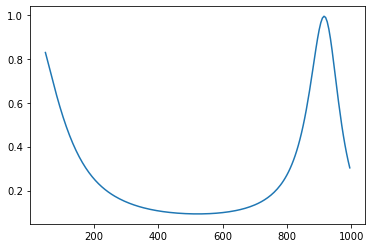

In [51]:
def main(): 
    
    r_helm_opening = 0.022 #orig: 0.0079 #units: m 


    L_helm = 0.013462 #orig: (1.57*10**-4)/(np.pi*r_helm_opening**2)#units: m from koju et. al
    S_outside = (0.051**2)*np.pi #orig: 0.0079 #units: m^2 from koju et. al. 
    S_neck = (0.01081**2)*np.pi #orig 2*10**-4 #units: m^2 from Koju et. al.

    l_list = [0.013462,0.022,0.013462,0.022,0.013462] #orig [0.2, 0.05,0.02, 0.05,0.2]; these original parameters come from Koju et al.
    print(l_list)
    s_list = [S_outside, S_neck, S_outside, S_neck, S_outside] #orig [0.0079, 2.00*10**-4, 0.0079, 2.00*10**-4, 0.0079] #parameters are from Koju et. al EAT mediated by Helmholtz res"
    print(s_list)

 
    frequency_list = np.arange(50,1000,5)

    M = transmittance(frequency_list, s_list, l_list, S_outside) 

    plt.plot(frequency_list, M)
    plt.show()

main()